# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [55]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | balsas
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | pasni
Processing Record 7 of Set 1 | altai
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | childress
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | wenshan city
City not found. Skipping...
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | santo antonio
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | fale old settlement
Processing Record 16 of Set 1 | dakhla
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | kailua-kona
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of Set 1 | g

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,297.17,99,100,1.62,IN,1691354519
1,balsas,-7.5325,-46.0356,305.87,23,51,2.26,BR,1691354300
2,ribeira grande,38.5167,-28.7000,297.37,73,20,2.24,PT,1691354519
3,hermanus,-34.4187,19.2345,283.04,87,0,3.14,ZA,1691354519
4,utrik,11.2278,169.8474,301.09,80,83,9.73,MH,1691354520


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,297.17,99,100,1.62,IN,1691354519
1,balsas,-7.5325,-46.0356,305.87,23,51,2.26,BR,1691354300
2,ribeira grande,38.5167,-28.7000,297.37,73,20,2.24,PT,1691354519
3,hermanus,-34.4187,19.2345,283.04,87,0,3.14,ZA,1691354519
4,utrik,11.2278,169.8474,301.09,80,83,9.73,MH,1691354520


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

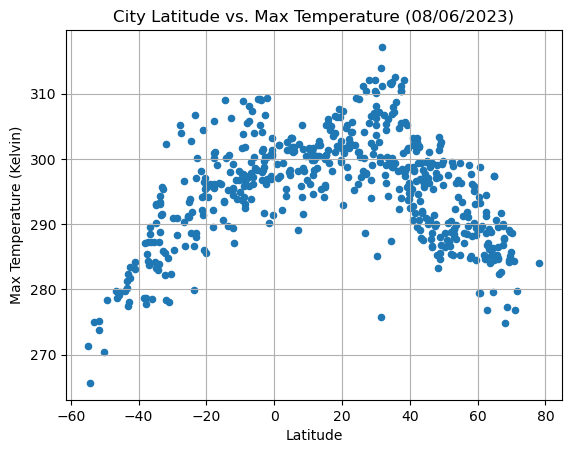

In [60]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (08/06/2023)")
plt.ylabel("Max Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

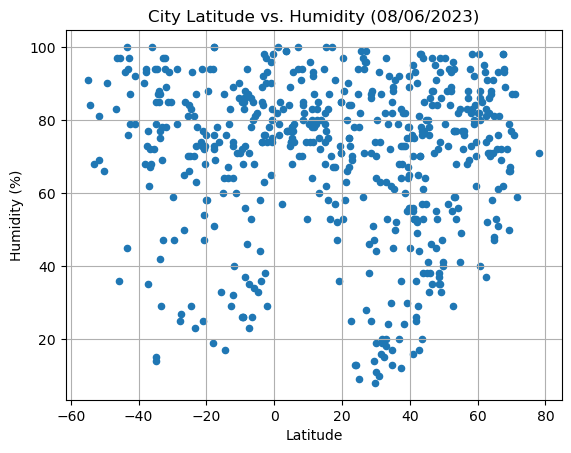

In [61]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (08/06/2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

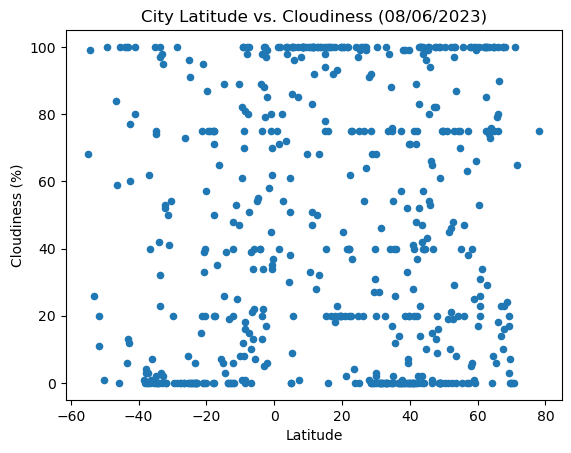

In [62]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (08/06/2023)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

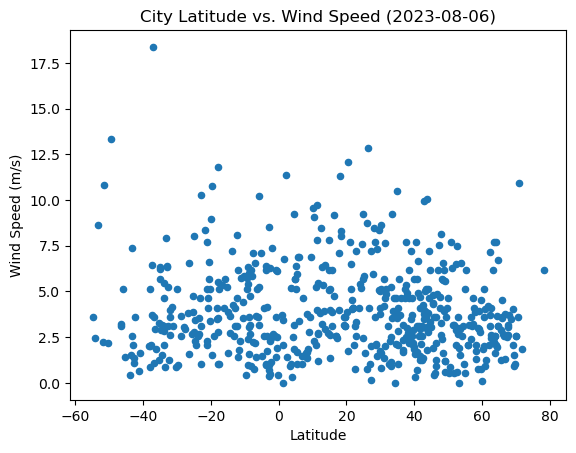

In [63]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-08-06)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def linear_regression_plot(df, x_values, y_values):
    """
    Perform linear regression and create a scatter plot with the regression line.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the data
        x_values (str): x-axis values
        y_values (str): y-axis values
    """
    # Perform Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_values], df[y_values])

    # Regression line equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot
    df.plot.scatter(x_values, y_values)
    #df.plot(df[x_values], slope*df[x_values] + intercept, color='red', label='Regression Line')

    # Print r-value
    print(f"The r-value is: {rvalue}")
    plt.axline((0, intercept), slope=slope, color='red')
    plt.annotate(line_eq, (0.2, 0.2), xycoords="figure fraction", fontsize=15, color='red')

    #Plot the data and the regression line
    # (x-min, x-max) = plt.xlim()
    # (y-min, y-max) = plt.ylim()
    # plt.axline((0, intercept), slope=slope, color='red', label='Regression Line')

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,297.17,99,100,1.62,IN,1691354519
2,ribeira grande,38.5167,-28.7000,297.37,73,20,2.24,PT,1691354519
4,utrik,11.2278,169.8474,301.09,80,83,9.73,MH,1691354520
5,pasni,25.2631,63.4710,300.31,82,99,5.83,PK,1691354520
6,altai,46.3722,96.2583,287.68,46,66,0.95,MN,1691354520


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,balsas,-7.5325,-46.0356,305.87,23,51,2.26,BR,1691354300
3,hermanus,-34.4187,19.2345,283.04,87,0,3.14,ZA,1691354519
7,adamstown,-25.0660,-130.1015,293.46,66,96,8.05,PN,1691354520
11,santo antonio,-6.3106,-35.4789,297.25,80,13,5.11,BR,1691354521
13,fale old settlement,-9.3852,-171.2468,301.62,72,82,5.15,TK,1691354521


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6127056957281822


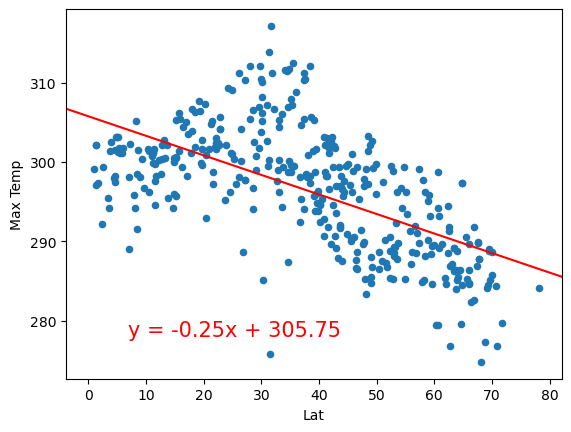

In [67]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.7928878413182056


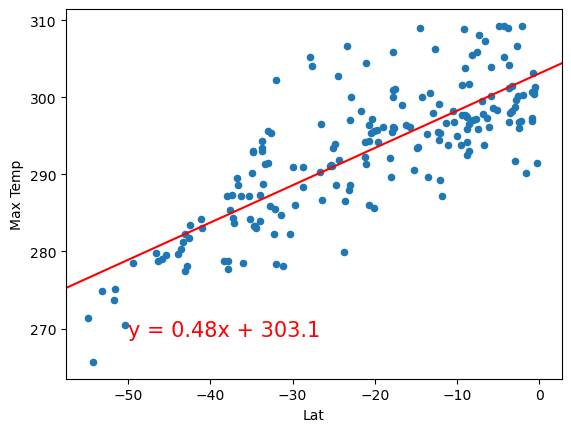

In [68]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** 
Temperature has a strong negative relationship to latitude in both the northern and southern hemispheres. The closer a location is to zero, the higher the temperature in both hemispheres. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.038659599624141214


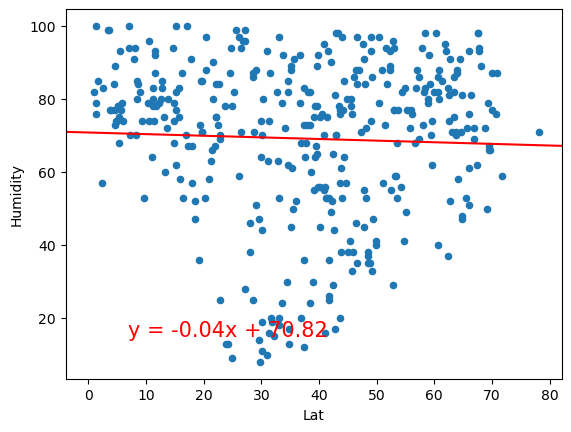

In [69]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, "Lat", "Humidity")

The r-value is: -0.13237797295737377


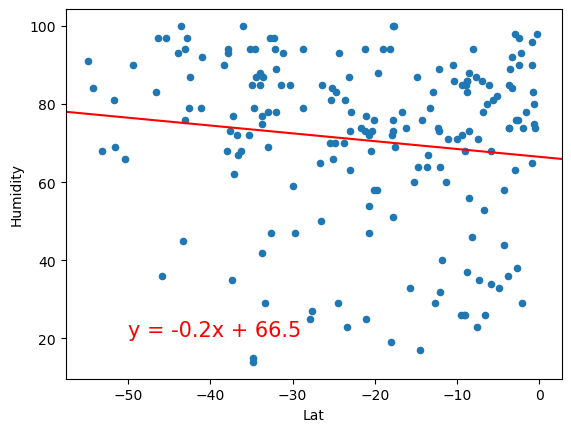

In [70]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** 
There is a very weak relationship between latitude and humidity in both the northern and southern hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.16440215380654136


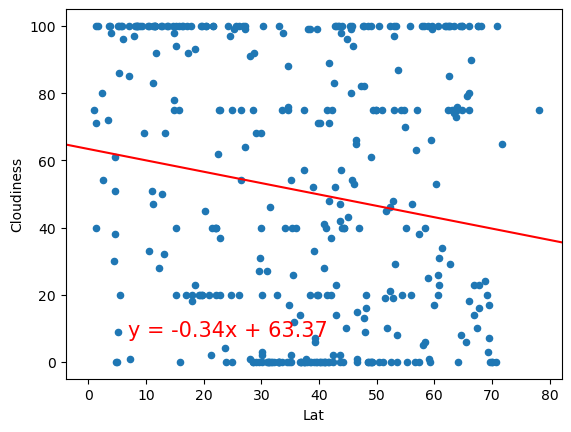

In [71]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 0.07897587542153253


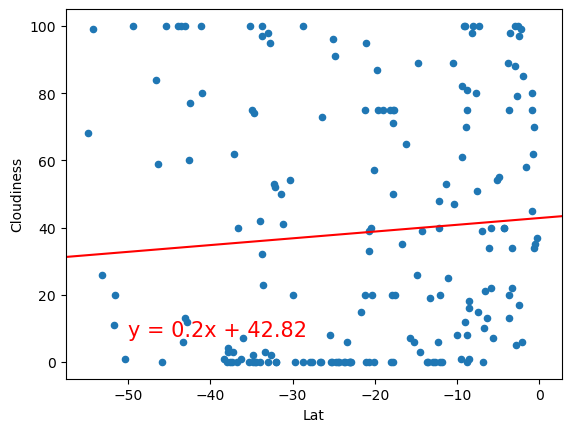

In [72]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** 
There is a weak negative relationship between cloudiness and latitude in the northern hemisphere. It is slightly less windy the further a location is from 0 latitude. There is a very weak relationship in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1805261291543161


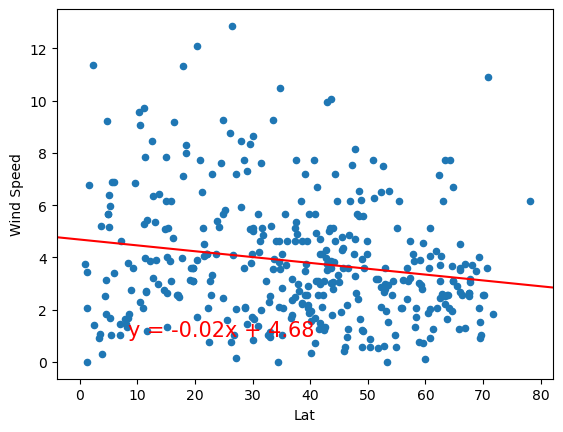

In [73]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: -0.04191965462699853


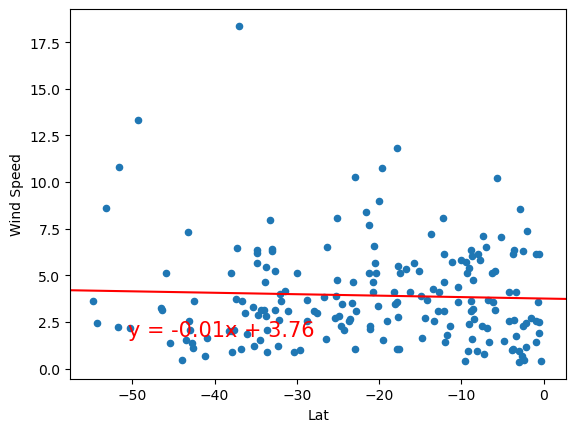

In [74]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** 
There is a very weak relationship between windspeed and latitude in both the northern and southern hemispheres.